In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from qiskit.quantum_info import Statevector

In [2]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(8,8)
#Input 0,1,4
qc.h(0)
qc.h(1)
qc.h(4)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=8, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(8, 'q'), 0), Qubit(QuantumRegister(8, 'q'), 1), Qubit(QuantumRegister(8, 'q'), 2), Qubit(QuantumRegister(8, 'q'), 3), Qubit(QuantumRegister(8, 'q'), 4), Qubit(QuantumRegister(8, 'q'), 5), Qubit(QuantumRegister(8, 'q'), 6), Qubit(QuantumRegister(8, 'q'), 7)), clbits=())

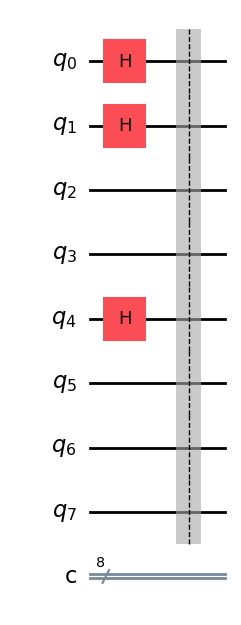

In [3]:
qc.draw('mpl')

### Logical Formula Representation

The Boolean formula is represented as:

φ = (x₁ ↔ x₂) ∧ (x₁ ∧ x₂) ∧ ¬x₃

#### Components Breakdown:
1. **Equivalence**:  
   `(x₁ ↔ x₂)` - x₁ if and only if x₂ (XNOR)
2. **Conjunction**:  
   `(x₁ ∧ x₂)` - Both x₁ AND x₂ must be true
3. **Negation**:  
   `¬x₃` - x₃ must be false

#### Alternative Symbols:
- ↔ can be written as `≡` or "iff"
- ∧ can be written as `AND` or `&`
- ¬ can be written as `NOT` or `~`

#### Truth Table Preview:
| x₁ | x₂ | x₃ | x₁↔x₂ | x₁∧x₂ | ¬x₃ | φ   |
|----|----|----|-------|-------|-----|-----|
| T  | T  | F  | T     | T     | T   | T   |
| Other combinations... | ... | ... | ... | ... | ... | F   |

### Quantum Oracle Implementation for Logical AND

#### Qubit Allocation
| Qubit Index | Role          | Initial State |
|-------------|---------------|---------------|
| 0           | x₁ variable   | |x₁⟩          |
| 1           | x₂ variable   | |x₂⟩          |
| 2           | Ancilla       | |0⟩           |


#### AND Operation Implementation
The logical AND (`x₁ ∧ x₂`) is computed using a Toffoli gate:

```python
qc.ccx(0, 1, 2)  # CCX(control1, control2, target)

In [4]:
qc.ccx(0,1,2)

### Quantum XNOR (Equivalence) Implementation

### Qubit Allocation
| Qubit | Role          | Initial State |
|-------|---------------|---------------|
| 1     | x2 variable   | |x2⟩          |
| 3     | x1  fixed to 1| |1⟩           |
| 0     | Ancilla       | |0⟩           |

## XNOR = NOT(x2 XOR x1) Implementation

### Step 1: XOR Computation
```python
qc.ccx(3, 1, 0)  # CCX(|1⟩,|x2⟩,|0⟩) → |1⟩|x2⟩|x2⊕1⟩

In [5]:
qc.x(3)
qc.ccx(3,0,1)
qc.x(1)

In [6]:
qc.x(3)
qc.ccx(1,2,3)


In [7]:
qc.x(4)
qc.ccx(3,4,5)

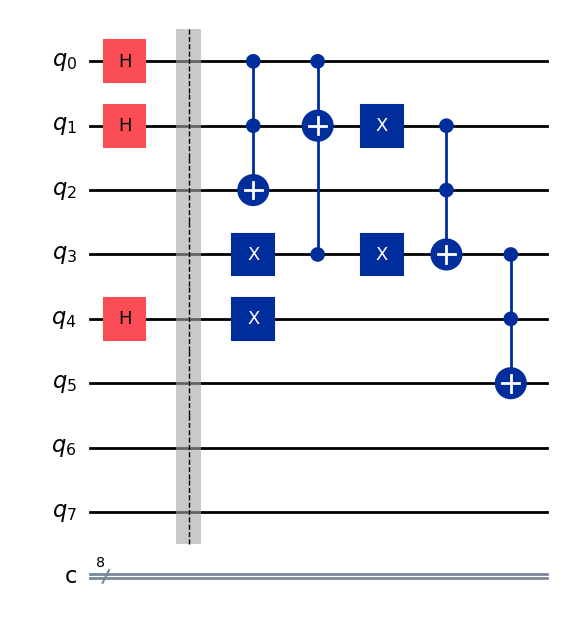

In [8]:
qc.draw('mpl')

In [13]:
qc2 = QuantumCircuit(8,8)
#Input 0,1,4
qc2.h(0)
qc2.h(1)
qc2.h(4)
qc2.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=8, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(8, 'q'), 0), Qubit(QuantumRegister(8, 'q'), 1), Qubit(QuantumRegister(8, 'q'), 2), Qubit(QuantumRegister(8, 'q'), 3), Qubit(QuantumRegister(8, 'q'), 4), Qubit(QuantumRegister(8, 'q'), 5), Qubit(QuantumRegister(8, 'q'), 6), Qubit(QuantumRegister(8, 'q'), 7)), clbits=())

In [14]:
#First And 2 is zero
qc2.ccx(0,1,2)
qc2.barrier()
#Result in 2

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=8, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(8, 'q'), 0), Qubit(QuantumRegister(8, 'q'), 1), Qubit(QuantumRegister(8, 'q'), 2), Qubit(QuantumRegister(8, 'q'), 3), Qubit(QuantumRegister(8, 'q'), 4), Qubit(QuantumRegister(8, 'q'), 5), Qubit(QuantumRegister(8, 'q'), 6), Qubit(QuantumRegister(8, 'q'), 7)), clbits=())

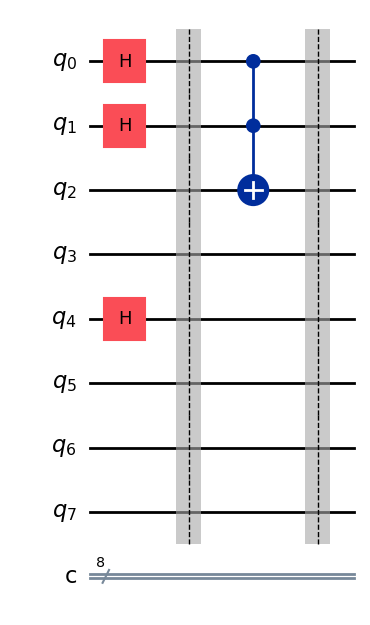

In [15]:
qc2.draw('mpl')